In [4]:
from models.ticker import Ticker
from models.time_series import TimeInterval, DataType
from processing.graphing import display
from api.mongo_db import Mongo
from datetime import date

# Alpha Vantage

In [6]:
# You can initilize the class with the stock you want (setting get_name to True burns an extra API call).
ticker = Ticker("AAPL", get_name=True)

# Then you can request the data you want using the DataType ENUM. Time Interval is only used for intraday.
ticker.get_data(data_type=DataType.INTRADAY, time_interval=TimeInterval.HOUR)

Data Representation

In [9]:
# Can be accessed as object
ticker

# as a JSON
ticker.to_json()

# or saved in CSV format
ticker.to_CSV()

# MongoDB

In [3]:
# You can download a specific ticker from Mongo if it is stored by doing
ticker = Mongo.get_ticker("AXP")

# This downloads all of the MongoDB as a list of tickers.
all_data = Mongo.download()

# You can save data to MongoDB with the following method. It only takes a Ticker class object.
Mongo.save_data(ticker)

# Download real-time data

In [115]:
# Get latest data from API
ticker = Ticker("AAPL", get_name=True)
ticker.get_data(data_type=DataType.INTRADAY, time_interval=TimeInterval.ONE)

# Save updated data if needed
# Mongo will verify if the information is duplicate, or new,
# and will update with the latest values
Mongo.save_data(ticker)

# Graphing

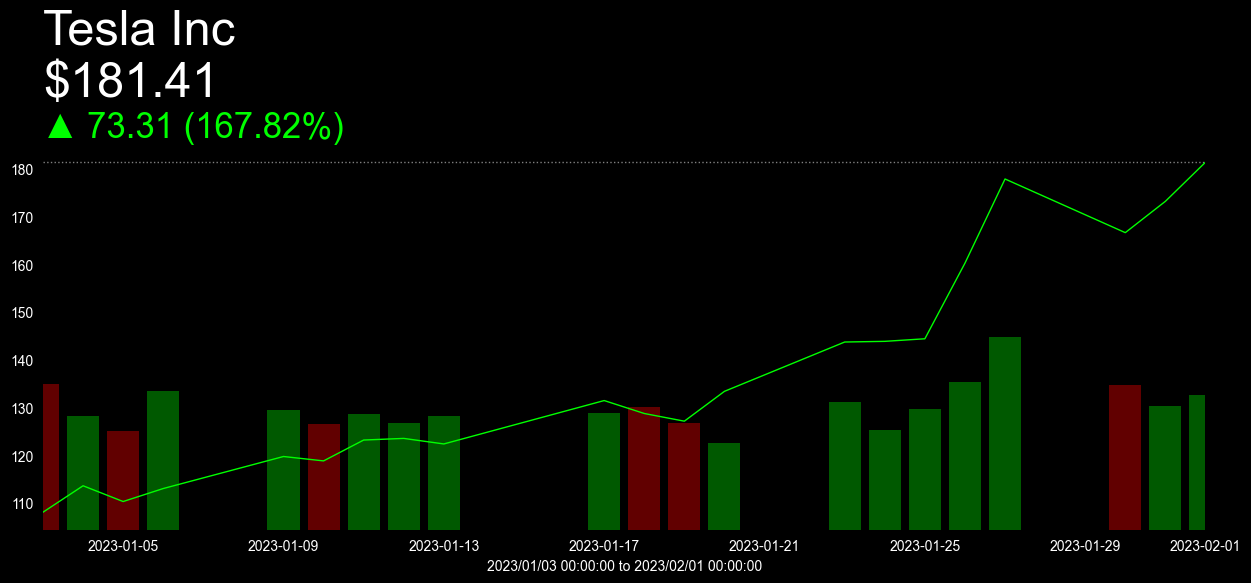

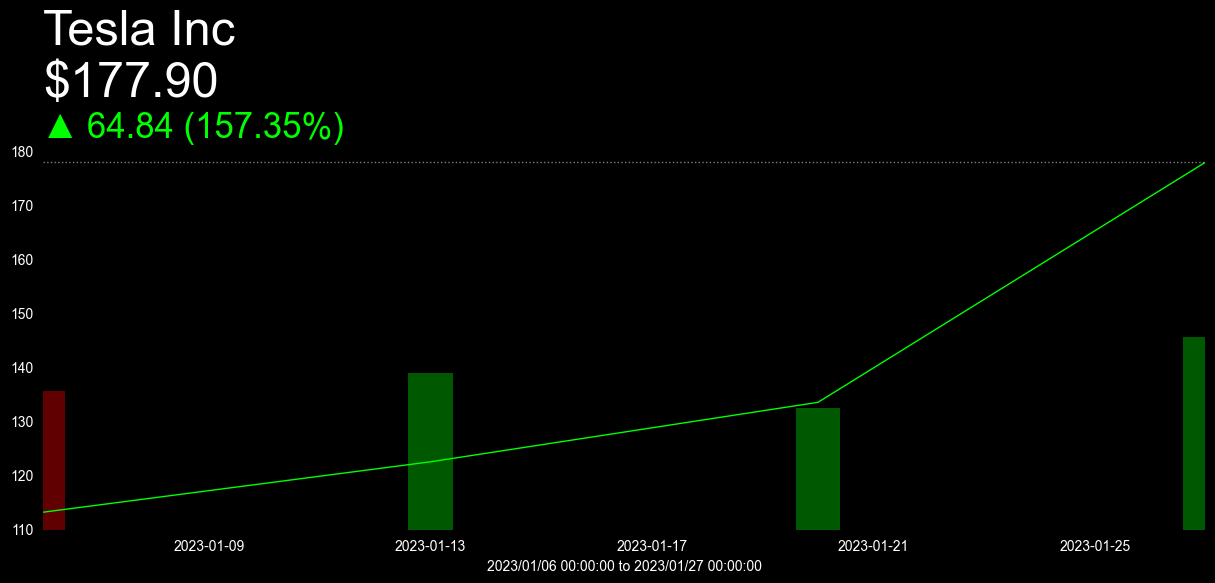

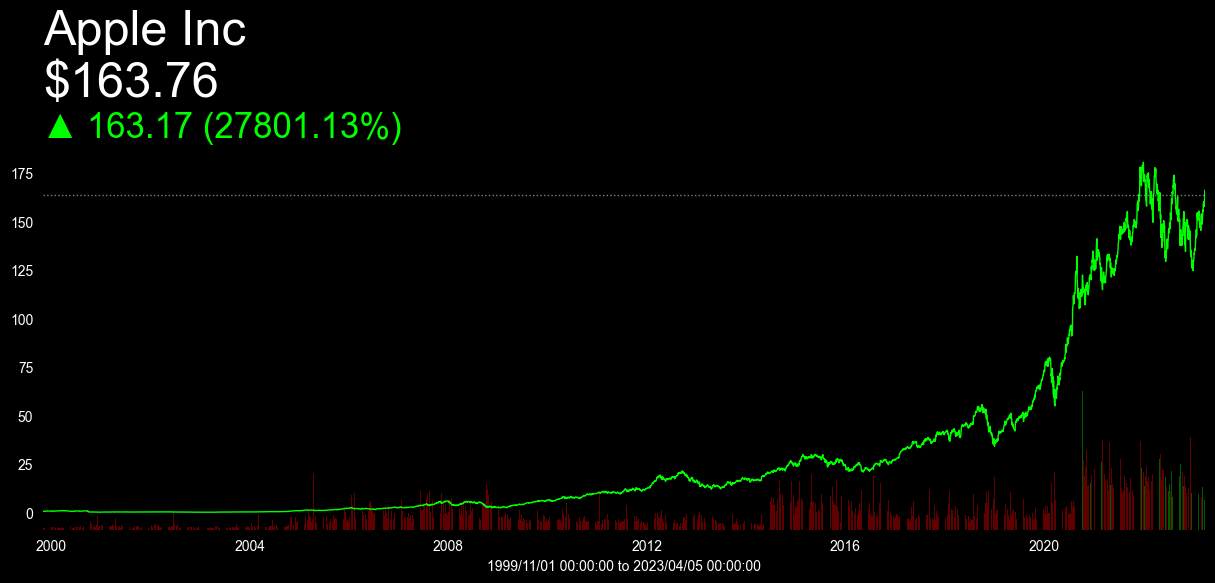

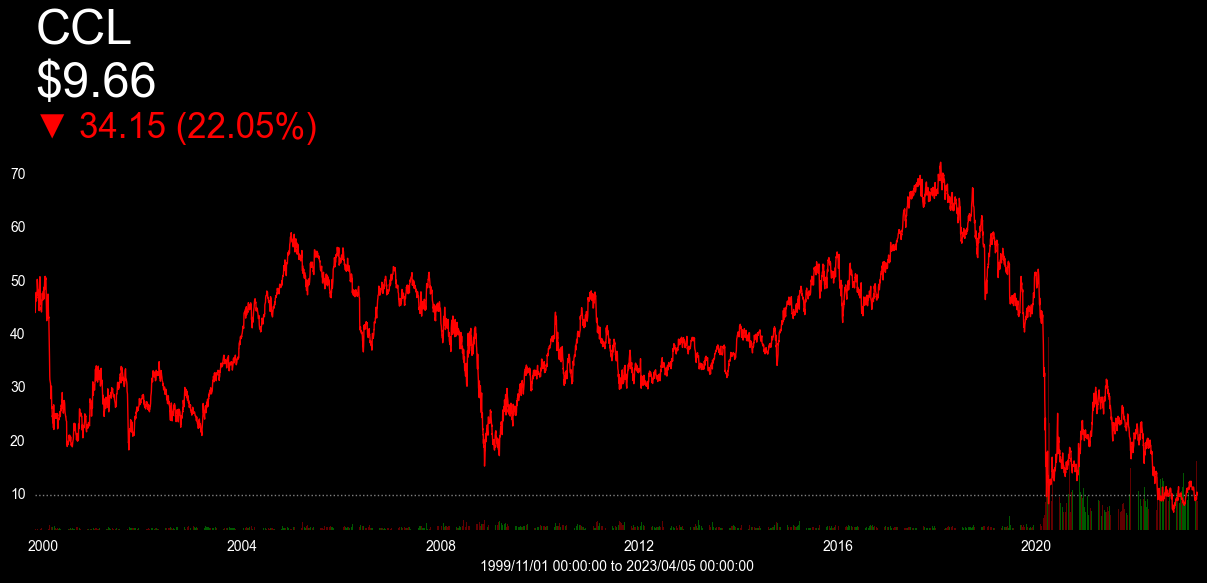

In [2]:
# We can display a graph and specify date ranges as we see fit. For example
# we can ask for Tesla stock price for Jan 2023 like so:
display("TSLA",
        start=date(year=2023, month=1, day=1),
        end=date(year=2023, month=2, day=1)
)

# By default the data will be DAILY, but we can specify if we want something else
# we can see how the graph changes if we choose weekly instead.
display("TSLA",
        kind=DataType.WEEKLY,
        start=date(year=2023, month=1, day=1),
        end=date(year=2023, month=2, day=1)
)

# If we do not specify a start or end, it will default to everything we have.
display("AAPL")

# We can also specify if we want the information updated from Alpha Vantage
# in case it is not in the database, or we wish to display more up to date info.
display("CCL", update=True)


In [5]:
all_data = Mongo.download()

OperationFailure: bad auth : Authentication failed., full error: {'ok': 0, 'errmsg': 'bad auth : Authentication failed.', 'code': 8000, 'codeName': 'AtlasError'}